In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math as math
import itur as itur
import astropy.units as u

In [2]:
#task 1
f_c = 18e9
noise_figure = 2
distance = 10e3
P_t = 10e-3
wavelength = 0.0167
bit_rate = 34e6
noise_system = 290  * 1.38e-23 * bit_rate * noise_figure
noise_systemdB = 10 * np.log10(noise_system)# + 3
minimum_signal_powerdBW = noise_systemdB + 30
minimum_signal_power = 10**(minimum_signal_powerdBW/10)
antennaArea = np.sqrt((minimum_signal_power) / P_t) * distance * wavelength

diameter = np.sqrt((antennaArea * 4)/(np.pi * 0.57))
print(diameter)

0.24806892594596122


In [3]:
#task 1 igen
ebN0 = 10**3
gain = np.sqrt((ebN0 * noise_figure * 290 * 1.38e-23 *bit_rate * ((4 * np.pi * distance / wavelength))**2) / P_t)
print(10 * np.log10(gain))
ae = (gain * wavelength**2) / (4*np.pi)
d = (ae*4)/(np.pi * 0.57)
print(np.sqrt(d))

30.938863913777276
0.24806892594596117


In [4]:
#task 1 igen..
denom =  290 * 1.38e-23 * noise_figure * bit_rate * ((4 * np.pi * distance)/wavelength)**2
#numerator = P_t * ((4 * np.pi)/wavelength**2)**2
#A_e = np.sqrt((1000 * denom)/numerator)
#dia = np.sqrt((A_e * 4) / (0.56 * np.pi))

lossFreeSpace = ((4 * np.pi * distance)/wavelength)**2
gainR = ((4*np.pi)/wavelength**2) * ((0.57*np.pi)/4)
totGain = gainR**2
numerator = totGain * P_t
factor = numerator / denom
dia = np.sqrt((1000 * denom)/numerator)
nom =1000/(4.38e21/5684e10)
dia = nom**.25

print(dia)
print(numerator)
print(lossFreeSpace)

0.060019861605382356
4068959.0349640357
56622206037301.36


In [5]:
#task 1 igen....
lossFreeSpace = ((4 * np.pi * distance)/wavelength)**2
denom =  290 * 1.38e-23 * noise_figure * bit_rate #* lossFreeSpace#* ((4 * np.pi * distance)/wavelength)**2
gainR = ((4*np.pi)/wavelength**2) * ((0.57*np.pi)/4)
totGain = gainR**2
numerator = totGain * P_t
factor = numerator / denom

dia = (1000/factor)**.25
print(totGain)
print(numerator, 'num')
print(denom, 'denom')
print(lossFreeSpace)
print(factor)

406895903.4964036
4068959.0349640357 num
2.7213600000000005e-13 denom
56622206037301.36
1.4951932250654212e+19


In [6]:
#task 2
r = 5e3
#carrierFreq = 900e6
noiseIn = 1.38e-23 * 25e3 * 290
#noiseOut = noiseIn * (10**0.5 - 1)
gaindBi = 8 + 2.15
antenna_G = 10**(gaindBi/10)
signal_strength = 25*antenna_G
lossdB = 31.5 + 35 * np.log10(r)
loss = 10**(lossdB/10)
#multiplied with dipole gain!
#recieved_strength = (signal_strength*1.64)/loss
recieved_strength = (signal_strength*1.64)/loss
snr_indB = 10 * np.log10(recieved_strength/noiseIn)
snr_outdB = snr_indB - 5
print(snr_indB, 'snr in')
print(snr_outdB, 'dB')

25.311717485714414 snr in
20.311717485714414 dB


In [7]:
#task 3
bandwidth = 10e6
noise_figuredB = 8
noise_figure = 10**0.8 
noise = 1.38e-23 * bandwidth * 290 * 10**0.8
noisedB = 10 * np.log10(noise)
signaldB = (46 - 30) - 2 + 19
snrdB = 30
log_r = (signaldB - noisedB - snrdB - 40.7)/35
print(log_r)
r = 10**log_r
print(r)

2.5222065473428024
332.8178014210799


In [8]:
Pt=46-30
Gt=19
Peirp=Pt+Gt
B= 10 * math.log10(10e6)
F=8 #ignore noise figure in this assignment

Gr=0
SNR=30
cableloss=2
k=10*math.log10(1.38e-23)
T0=10*math.log10(290)

r_log10=(-40.7-SNR+Peirp+Gr-k-T0-B-cableloss)/35
r_log10 = (Peirp - T0 - SNR - F - k - B - cableloss)/35
r_linear=10**r_log10
r_linear

4842.43377687734

In [9]:
#task 3 igen
peirp = 19 + (46-30) - 2
ktSysdB = 10 * np.log10(1.38e-23 * 290 * ((10**0.8)-1) * 10e6)# - 10 * np.log10(10e6)
snrdB = 30
logR = (peirp - snrdB - ktSysdB - 40.7)/35
r = 10**logR
print(r)

349.63756009004163


In [10]:
#TO DB
def to_dB(number):
    return 10 * np.log10(number)

In [11]:
# LINK BUDGET
f_c = 18e9 #+ (55e6/2)
wavelength = 3e8/f_c
B = 55e6
Tx_power = 1
Tx_powerdB = 10 * np.log10(Tx_power)
distance = 12e3
diameter = 0.9
antenna_area = (0.57 * np.pi * diameter**2)/4
antenna_gain = (4 * np.pi * antenna_area)/wavelength**2
print(antenna_gain)

#=============TRANSCIEVER DATA
minimun_detectable_signal = -93
noise_factor_receiver = 15

16404.466867138643


20.50697913557581


([<matplotlib.axis.XTick at 0x7faf8efc5360>,
 [Text(0, 0, '1'),
  Text(1, 0, '0.3'),
  Text(2, 0, '0.1'),
  Text(3, 0, '0.03'),
  Text(4, 0, '0.01'),
  Text(5, 0, '0.003'),
  Text(6, 0, '0.001')])

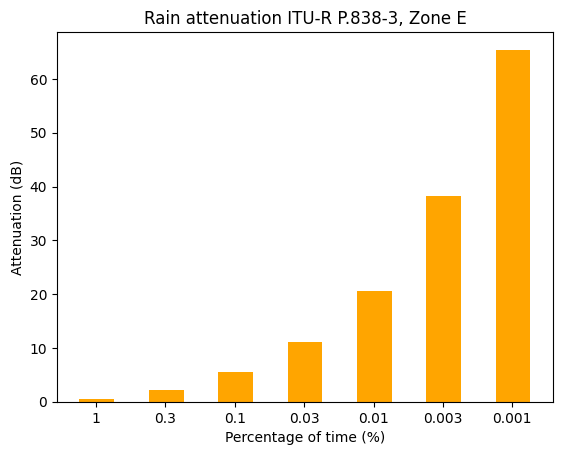

In [12]:
#ITU rain attenuation Vertical
def rain_attenuation(dist, R = 0.6):
    alpha = 1.0025
    k = 0.07708
    y = k * R**alpha
    return y * dist
print(rain_attenuation(12, 22))
width = 0.5
rain_list = [0.6, 2.4, 6, 12, 22, 41, 70]
percentage = [1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001]
for i, el in enumerate(rain_list):
    plt.bar(i+0.01, rain_attenuation(12, el), color='orange', width = width)

plt.ylabel("Attenuation (dB)")
plt.xlabel("Percentage of time (%)")
plt.title("Rain attenuation ITU-R P.838-3, Zone E")
plt.xticks(np.arange(7), percentage)

free space -91.08034256542142
plane earth: -49.24687837075331


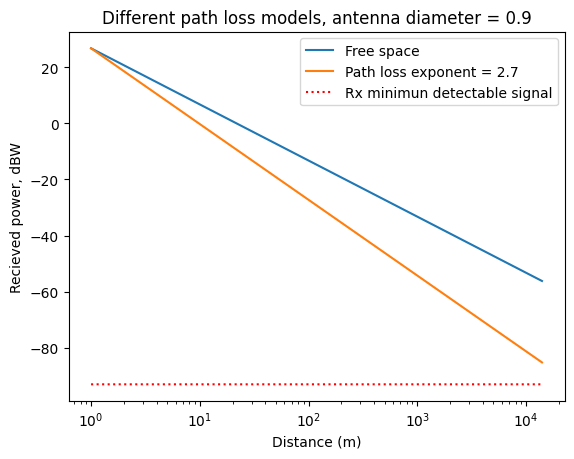

In [13]:
#free space model
power_recieved = (Tx_power * antenna_gain**2 * wavelength**2)/(4*np.pi * distance)**2.7
power_recievedB = 10 * np.log10(power_recieved)
print('free space', to_dB(power_recieved))

#noise
noise = 1.38e-23 * B * 290 * 10**(noise_factor_receiver/10)
SNR = power_recieved / noise
SNRdB = 10 * np.log10(SNR)
#print(SNR)

#plan jord-modell
h_1 = 135
h_2 = 156
power_received_plane_earth = (Tx_power * antenna_gain* antenna_area * (np.sin(2 * np.pi *  h_1 * h_2/(wavelength*distance)))**2/(np.pi*distance**2))
print('plane earth:', to_dB(power_received_plane_earth))
#print(wavelength * distance)
def free_space(distance, power_transmit, antenna_gain, wavelength):
    return (Tx_power * antenna_gain**2 * wavelength**2)/(4*np.pi * distance)**2
def path_loss_exponent(distance, power_transmit, antenna_gain, wavelength, k):
    return (Tx_power * antenna_gain**2 * wavelength**2)/((4*np.pi)**2 * distance**k)
def plane_earth(distance, h_1, h_2, power_transmit, antenna_areaR, wavelength):
    return (Tx_power * antenna_gain* antenna_area * (np.sin(2 * np.pi *  h_1 * h_2/(wavelength*distance)))**2/(np.pi*distance**2))

#rician fading----------------------------------
#rician = 

free_space_list = []
plane_earth_list = []
path_loss_exponent_list = []
for i in range(1, 14000):
    free_space_list.append(to_dB(free_space(i * 1, Tx_power, antenna_gain, wavelength)))
    path_loss_exponent_list.append(to_dB(path_loss_exponent(i * 1, Tx_power, antenna_gain, wavelength, 2.7)))
    plane_earth_list.append(to_dB(plane_earth(i * 1, h_1, h_2, Tx_power, antenna_area, wavelength)))

plt.xscale('log')
plt.title("Different path loss models, antenna diameter = %0.1f" % diameter)

plt.plot([x for x in range(1, 14000)], free_space_list, label='Free space')
plt.plot([x for x in range(1, 14000)], path_loss_exponent_list, label='Path loss exponent = 2.7')
#plt.plot([10 * x for x in range(1, 14000)], plane_earth_list, label='Plane earth', linestyle='solid')
plt.plot([x for x in range(1, 14000)], [minimun_detectable_signal]*13999, label='Rx minimun detectable signal', linestyle = 'dotted', color = 'red')
plt.ylabel('Recieved power, dBW')
plt.xlabel('Distance (m)')
plt.legend()

-83.38587351726675
9.10287855600238


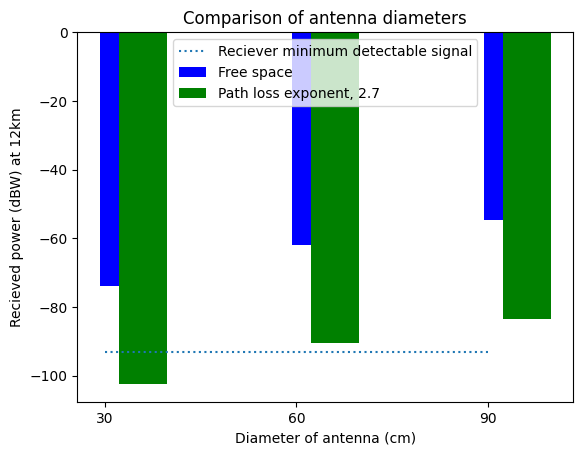

In [14]:
dias = [0.3, 0.6, 0.9]
di = ['30', '60', '90']
power_recieved_plane_earthLIST = []
power_recieved_free_spaceLIST = []
power_recieved_pathexpLIST = []
SNR_linkLIST = []

for i in range(0, 3):
    antenna_area = (0.57 * np.pi * dias[i]**2)/4
    antenna_gain = (4 * np.pi * antenna_area)/wavelength**2
    power_recieved_free_spaceLIST.append(to_dB(free_space(distance, Tx_power, antenna_gain, wavelength)))
    power_recieved_pathexpLIST.append(to_dB(path_loss_exponent(distance, Tx_power, antenna_gain, wavelength, 2.7)))
    power_recieved_plane_earthLIST.append(to_dB(plane_earth(distance, h_1, h_2, Tx_power, antenna_area, wavelength)))
    SNR_linkLIST.append(power_recieved_pathexpLIST[i]/(290 * 1.38e-23 * 55e6 * 10**(noise_factor_receiver/10)))
## NOISE

width = 0.25
plt.xticks(np.arange(3), di)
plt.title('Comparison of antenna diameters')
plt.ylabel('Recieved power (dBW) at 12km')
plt.xlabel('Diameter of antenna (cm)')
for i in range(0, 3):
    #plt.bar(i, power_recieved_plane_earthLIST[i], color='red', width = width)
    plt.bar(i+0.1, power_recieved_free_spaceLIST[i], color='blue', width = width)
    plt.bar(i+0.2 , power_recieved_pathexpLIST[i], color='green', width = width)
  
#plt.bar(2, power_recieved_plane_earthLIST[2], color='red', width = width, label='Plane earth')
plt.bar(2+0.1, power_recieved_free_spaceLIST[2], color='blue', width = width, label='Free space')
plt.bar(2+0.2 , power_recieved_pathexpLIST[2], color='green', width = width, label='Path loss exponent, 2.7')

plt.plot(range(0, 3), [minimun_detectable_signal]*3, linestyle='dotted', label='Reciever minimum detectable signal')
plt.legend()
print(power_recieved_pathexpLIST[2])
print(power_recieved_pathexpLIST[0] - to_dB(noise))


Text(0.5, 0, 'Radius (m)')

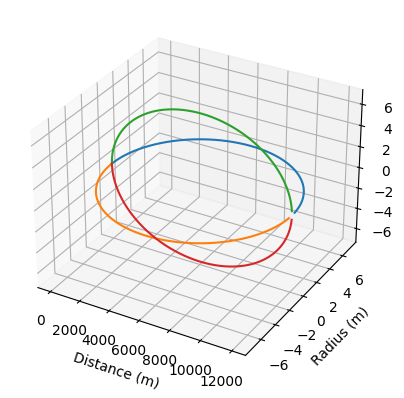

In [15]:
#FRESNEL ZONES 3D
def calculate_fresnelZones(d_1, d_2, n = 1):
    return np.sqrt(n * wavelength * (d_1* d_2)/ (d_1+ d_2))

fresnel_bound1 = []
for i in range(0, 12000, 10):
    fresnel_bound1.append(calculate_fresnelZones(distance - i, i, 1))
#print(fresnel_bound1)
negative_fresnel_bound1 = [x*-1 for x in fresnel_bound1]

#3D
x = [x for x in range(0, 12000 ,10)]
ax = plt.figure().add_subplot(projection='3d')
#plt.figure(figsize=(10))
ax.plot(x, fresnel_bound1, linestyle='solid')
ax.plot(x, negative_fresnel_bound1, linestyle = 'solid')
ax.plot(x, [0 for x in range(0, 12000, 10)], fresnel_bound1, linestyle = 'solid')
ax.plot(x, [0 for x in range(0, 12000, 10)], negative_fresnel_bound1, linestyle = 'solid')
#ax.set_xticks()
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Radius (m)')
ax.set_zlabel('Radius (m)')

<Figure size 20000x100 with 0 Axes>

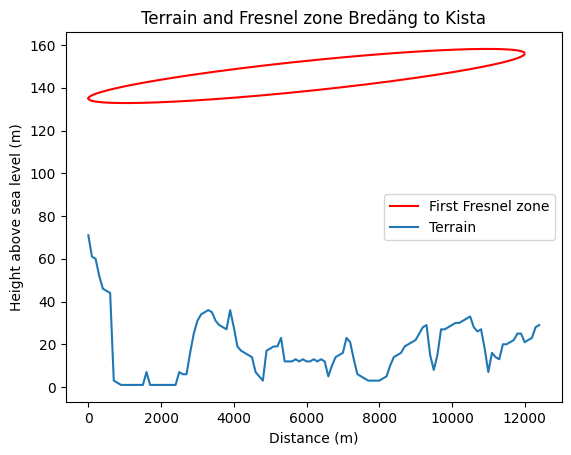

<Figure size 20000x100 with 0 Axes>

In [16]:
#2D fresnel zones
fresnel_bound2 = []
negative_fresnel_bound2 = []
elevation_list = []
def elevation_func(x):
    return 0.00175 * x + 135

for i in range(0, 12000, 10):
    fresnel_bound2.append(calculate_fresnelZones(distance - i, i, 1) + elevation_func(i))
    negative_fresnel_bound2.append(-1 * calculate_fresnelZones(distance - i, i, 1) + elevation_func(i))
    elevation_list.append(elevation_func(i))
    
#negative_fresnel_bound2 = [x*-1 for x in fresnel_bound2]
height_list0 = [29, 28, 23, 22, 21, 25, 25, 22, 21, 20, 20]
height_list1 = [13, 14, 16, 7, 18, 27, 26, 28, 33, 32, 31]
height_list2 = [30, 30, 29, 28, 27, 27, 15, 8, 15, 29, 28]
height_list3 = [25, 22, 21, 20, 19, 16, 15, 14, 10, 5, 4]
height_list4 = [3, 3, 3, 3, 4, 5, 6, 13, 21, 23]
height_list5 = [16, 15, 14, 10, 5, 12, 13, 12, 13, 12]
height_list6 = [12, 13, 12, 13, 12, 12, 12, 23, 19, 19]
height_list7 = [18, 17, 3, 5, 7, 14, 15, 16, 17, 19]
height_list8 = [28, 36, 27, 28, 29, 31, 35, 36, 35, 34]
height_list9 = [31, 25, 16, 6, 6, 7, 1, 1, 1, 1]
height_list10 = [1, 1, 1, 1, 7, 1, 1, 1, 1, 1]
height_list11 = [1, 1, 2, 3, 44, 45, 46, 52, 60, 61]
height_list12 = [71]

total_list = (height_list0 + height_list1 + height_list2 + height_list3 + height_list4 + height_list5 + 
              height_list6 + height_list7 + height_list8 + height_list9 + height_list10 + height_list11 + 
              height_list12)

total_list.reverse()
plt.plot([x for x in range(0, 12000, 10)], fresnel_bound2, color='red', label='First Fresnel zone')
plt.plot([x for x in range(0, 12000, 10)], negative_fresnel_bound2, color='red')
plt.plot(range(0, len(total_list)*100, 100), total_list, label='Terrain')
plt.ylabel('Height above sea level (m)')
plt.xlabel('Distance (m)')
plt.legend()
plt.title('Terrain and Fresnel zone Bredäng to Kista')
plt.figure(figsize=(200, 1))


In [17]:
#LOS
def calculateLOS(h_t, h_r):
    return 3.6*(np.sqrt(h_t)+np.sqrt(h_r)) 

calculateLOS(10, 10)

22.768399153212332

In [18]:
#-------------------------ITUR---------------------------------
c_freq = 18 * u.GHz
antenna_D = diameter * u.m
pos_bred = [59.29867, 17.932479]
pos_kista = [59.406638, 17.957430]

# Satellite coordinates (GEO, 77 W)
lat_sat = pos_kista[0]
lon_sat = pos_kista[1]
h_sat = 0.1 * u.km

# Compute the elevation angle between satellite and ground station
el = itur.utils.elevation_angle(h_sat, lat_sat, lon_sat, pos_bred[0], pos_bred[1])


unavailible = np.logspace(-1.5, 1.5, 100)
#attenuations
gas_a = []
rain_a = []
cloud_a = []
scintillation_a = []
total_a = []

for p in unavailible:
    gas, rain, cloud, scintillation, total = itur.atmospheric_attenuation_slant_path(pos_bred[0], pos_bred[1],c_freq, el, p, antenna_D, return_contributions = True)
    gas_a.append(gas.value)
    rain_a.append(rain.value)
    cloud_a.append(cloud.value)
    scintillation_a.append(scintillation.value)
    total_a.append(total.value)

/home/jonatan/anaconda3/lib/python3.10/site-packages/itur/models/itu676.py:300: RuntimeWarning: The approximated method to compute the gaseous attenuation in recommendation ITU-P 676-11 is only recommended for elevation angles between 5 and 90 degrees
  warnings.warn(
/home/jonatan/anaconda3/lib/python3.10/site-packages/itur/models/itu618.py:169: RuntimeWarning: The method to compute the rain attenuation in recommendation ITU-P 618-12 is only valid for unavailability values between 0.001 and 5
  warnings.warn(


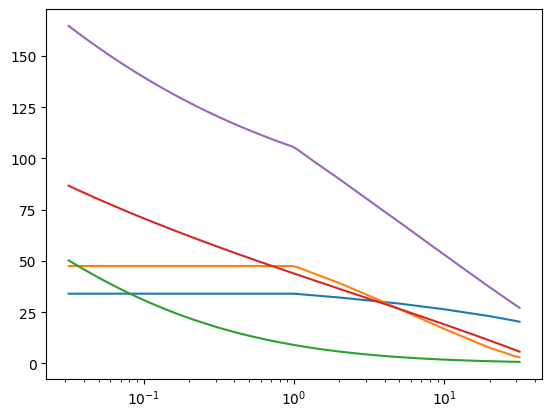

In [19]:
plt.semilogx(unavailible, gas_a)
plt.semilogx(unavailible, rain_a)
plt.semilogx(unavailible, cloud_a)
plt.semilogx(unavailible, scintillation_a)
plt.semilogx(unavailible, total_a)

[23.16638471 22.69143369 22.22595364 21.7699473  21.32340799 20.88631996
 20.45865862 20.04039088 19.63147541 19.23186298 18.84149673 18.46031251
 18.08823918 17.72519893 17.37110757 17.0258749  16.68940497 16.36159645
 16.04234289 15.7315331  15.42905141 15.13477801 14.84858927 14.57035803
 14.2999539  14.03724358 13.78209114 13.53435835 13.29390492 13.06058879
 12.83426646 12.6147932  12.40202335 12.19581056 11.99600806 11.80246889
 11.61504614 11.43359317 11.25796385 11.08801275 10.92359534 10.7645682
 10.61078918 10.46211759 10.31841433 10.17954209 10.04536543  9.91575096
  9.79056744  9.66968586  9.51171537  9.31660094  9.12550155  8.93828963
  8.75483971  8.57502844  8.39873467  8.22583949  8.05622626  7.88978071
  7.72024319  7.54896056  7.38054582  7.21489446  7.05190439  6.89147595
  6.7313866   6.57298556  6.41687158  6.26295506  6.11114887  5.96136828
  5.81353106  5.66487273  5.51451343  5.3658853   5.21891608  5.07353597
  4.92967769  4.78727643  4.64627     4.5065988   4.

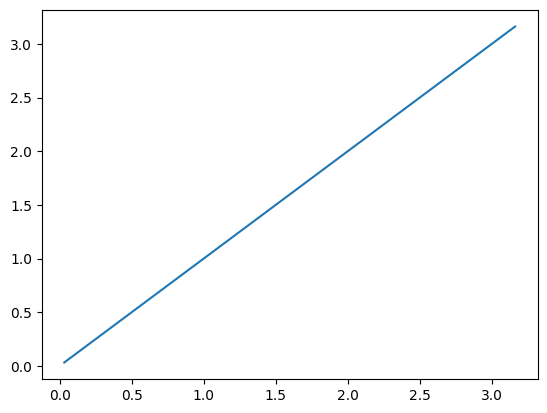

In [20]:
log =np.logspace(-1.5, 0.5, 100)
plt.plot(log, log)
print(itur.atmospheric_attenuation_slant_path(pos_bred[0], pos_bred[1],c_freq,5.0, unavailible, antenna_D))

/home/jonatan/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


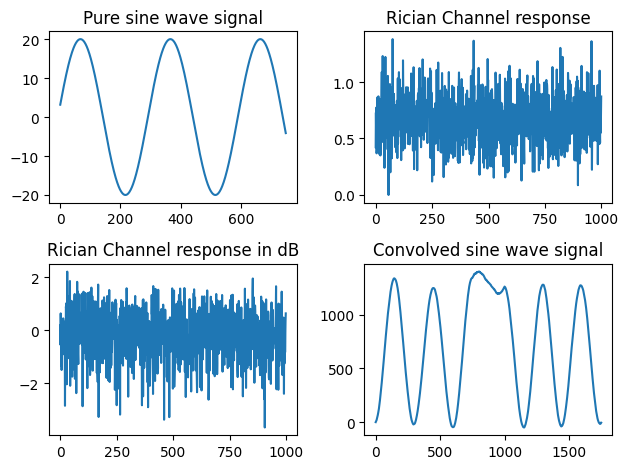

In [21]:
from numpy.random import standard_normal

# Sinusoidal waveform generation
t = np.linspace(1, 100, 750)
x_volts = 20*np.sin(t/(2*np.pi))
x_watts = x_volts ** 2
x_db = 10 * np.log10(x_watts)

# Rician channel coefficients

N = 1000 # Number of samples to generate
K_dB = 10 # K factor in dB
K = 10**(K_dB/10) # K factor in linear scale
mu = math.sqrt(K/(2*(K+1))) # mean
sigma = math.sqrt(1/(2*(K+1))) # sigma
h = (sigma*standard_normal(N)+mu)+1j*(sigma*standard_normal(N)+mu)
h_mag = np.abs(h)
h_mag_dB = 10*np.log10(h_mag) # convert channel response in dB

# Convolve rician channel response with sinusoidal waveform
Y4 = np.convolve(h, x_volts)

# Plots
figure, axis = plt.subplots(2, 2)
axis[0, 0].plot(x_volts)
axis[0, 0].set_title("Pure sine wave signal")
axis[0, 1].plot(h)
axis[0, 1].set_title("Rician Channel response")
axis[1, 0].plot(h_mag_dB)
axis[1, 0].set_title("Rician Channel response in dB")
axis[1, 1].plot(Y4)
axis[1, 1].set_title("Convolved sine wave signal")
plt.tight_layout()
plt.show()

In [22]:
#radiation safety
power_recievedJ = (Tx_power * antenna_gain * wavelength**2)/(4*np.pi * 1)**2
print(Tx_power * antenna_gain)
print(antenna_gain)
(Tx_power * antenna_gain)/(4*np.pi * 12**2)

16404.466867138643
16404.466867138643


9.065458301015047

In [23]:
#Fraunhofer distance
(2*0.9**2)/wavelength

97.2

In [24]:
#shannons formula
bandwidth = 55e6
ssnr = power_recieved_free_spaceLIST[1] - to_dB(noise)
C = bandwidth * np.log2(1 + 10**(ssnr/10))
C

908019695.8953499

In [25]:
#rician fading
import random as rn
f_n = []
for i in range(0, 4000):
    phase = rn.uniform(0, 2 * np.pi)
    #f_n.append(power_recieved_free_spaceLIST[0] * np.cos(phase))
    
for i, el in enumerate(f_n)
    np.sqrt(2/len(f_n)) *
    
power_recieved_free_spaceLIST[0]

SyntaxError: expected ':' (847009012.py, line 8)